## Aircraft Risk Analysis for Portfolio Diversification

### Project Goals

This project aims to Identify the safest, lowest-risk aircraft for commercial and private operations to minimize financial and operational risks.

### Data Sources 
the dataset is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

### Business Understanding

Key Questions:
* Which aircraft models have the lowest accident rates?
* What are the common causes of accidents for high-risk aircraft?
* How does aircraft age, manufacturer, and operational use affect safety?
* Which aircraft offer the best cost-safety tradeoff?



### 1. Importation of necessary libraries

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# open the csv file
df= pd.read_csv('AviationData.csv', encoding='latin' ,  low_memory=False , header=0)

In [82]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [83]:
# Afficher les 10 premières lignes
df.head(5)  

# Afficher 10 lignes aléatoires
#df.sample(10)  

# Afficher les 10 dernières lignes
#df.tail(10)  

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Exploration of the dataset

In [85]:
#See All the Columns
df.shape


(88889, 31)

In [86]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [87]:
df= df[['Event.Id','Event.Date','Injury.Severity',
        'Make','Model','Number.of.Engines','Engine.Type','Purpose.of.flight',
        'Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured','Broad.phase.of.flight','Weather.Condition']]

In [88]:
# Check the Nan Value of the dataset
df.isna().sum()
df

,Event.Id,Event.Date,Injury.Severity,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Broad.phase.of.flight,Weather.Condition
0,20001218X45444,1948-10-24,Fatal(2),Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Cruise,UNK
1,20001218X45447,1962-07-19,Fatal(4),Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,Unknown,UNK
2,20061025X01555,1974-08-30,Fatal(3),Cessna,172M,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,Cruise,IMC
3,20001218X45448,1977-06-19,Fatal(2),Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Cruise,IMC
4,20041105X01764,1979-08-02,Fatal(1),Cessna,501,NaN,NaN,Personal,1.0,2.0,NaN,0.0,Approach,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,2022-12-26,Minor,PIPER,PA-28-151,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN
88885,20221227106494,2022-12-26,NaN,BELLANCA,7ECA,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
88886,20221227106497,2022-12-26,Non-Fatal,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.0,NaN,Personal,0.0,0.0,0.0,1.0,NaN,VMC
88887,20221227106498,2022-12-26,NaN,CESSNA,210N,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN


### Eploration of Columns unique values.

In [90]:
#df['Aircraft.Category'].unique()
#df['Weather.Condition'].unique()

#df['Aircraft.damage'].unique()
#df['Injury.Severity'].unique()
#df['Amateur.Built'].unique()
#df['Engine.Type'].unique()
#df['Aircraft.Category'].unique()
#df['Purpose.of.flight'].unique()
#df['Weather.Condition'].unique()
#df['Broad.phase.of.flight'].unique()
#df['Engine.Type'].unique()
#df['Make'].unique()

 ## Data Cleaning

### Dealing with rows with unimportant charecters 

In [93]:
# In that columns rows with values (fatal (x) should change into fatal
df['Injury.Severity'] = df['Injury.Severity'].str.replace(r"\(.*\)", "", regex=True).str.strip()
df['Injury.Severity'].unique()
# In that columns rows with values (UNK is equal to Unk ) should change into Unk
df['Weather.Condition'] = df['Weather.Condition'].str.replace(r"Unk", "UNK", regex=True).str.strip()
df['Weather.Condition'].unique()

#Rewrite all The Cuntry name in Sentences
#df.loc[: ,'Make'] = df['Make'].str.title()

#Rewrite all The Make and Model in Sentences
df['Make'] = df['Make'].str.upper().str.strip()
df['Model'] = df['Model'].str.upper().str.strip()

### Drop Unecessary columns

In [95]:
#df=df.drop(['Registration.Number'], axis=1)
#df=df.dropna(subset=['Location'])

# Drop columns with excessive missingness (>50%)
##df = df.dropna(thresh=len(df)*0.5, axis=1)
#drop_cols = [
##    'Registration.Number',
#    'Airport.Code','Airport.Name'
#]

#df = df.drop(columns=drop_cols)

In [96]:
df.shape


(88889, 14)

### Data Imputation
Filling in missing or incomplete values in a dataset. It's a crucial step before analysis, especially when working with real-world data like aircraft specs or incident reports, which often have missing entries.



In [98]:
#df['Aircraft.damage'].fillna('Unknown', inplace=True)
df['Engine.Type'].fillna('Unknown', inplace=True)
df['Total.Fatal.Injuries'].fillna(0, inplace=True)
df['Total.Serious.Injuries'].fillna(0, inplace=True)
df['Total.Minor.Injuries'].fillna(0, inplace=True)
df['Total.Uninjured'].fillna(0, inplace=True)
df['Broad.phase.of.flight'].fillna('Unknown', inplace=True)

In [99]:

df=df.dropna(subset=['Make','Model','Injury.Severity',
                'Number.of.Engines','Purpose.of.flight',
                'Weather.Condition'
                    ])
df.isna().sum()

Event.Id                  0
Event.Date                0
Injury.Severity           0
Make                      0
Model                     0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Broad.phase.of.flight     0
Weather.Condition         0
dtype: int64

### Print of the dataset to see how it look like after Clean it up and Impute it.

In [101]:
df.head()

,Event.Id,Event.Date,Injury.Severity,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Broad.phase.of.flight,Weather.Condition
0,20001218X45444,1948-10-24,Fatal,STINSON,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Cruise,UNK
1,20001218X45447,1962-07-19,Fatal,PIPER,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,Unknown,UNK
2,20061025X01555,1974-08-30,Fatal,CESSNA,172M,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,Cruise,IMC
3,20001218X45448,1977-06-19,Fatal,ROCKWELL,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Cruise,IMC
6,20001218X45446,1981-08-01,Fatal,CESSNA,180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,Unknown,IMC


### Operation sur les Date 

In [103]:
# Convert to datetime

df.loc[:, 'Event.Date'] = pd.to_datetime(df['Event.Date'])

# Extract year
df.loc[:, 'Event.Year'] = df['Event.Date'].dt.year
df.loc[:, 'Event.Year'].astype(int)
df.head()


C:\Users\teach\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\teach\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


,Event.Id,Event.Date,Injury.Severity,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Broad.phase.of.flight,Weather.Condition,Event.Year
0,20001218X45444,1948-10-24,Fatal,STINSON,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Cruise,UNK,1948
1,20001218X45447,1962-07-19,Fatal,PIPER,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,Unknown,UNK,1962
2,20061025X01555,1974-08-30,Fatal,CESSNA,172M,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,Cruise,IMC,1974
3,20001218X45448,1977-06-19,Fatal,ROCKWELL,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Cruise,IMC,1977
6,20001218X45446,1981-08-01,Fatal,CESSNA,180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,Unknown,IMC,1981


### Number of Injuries

In [105]:
df.loc[:,'Total.injured'] = df['Total.Minor.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Fatal.Injuries']

C:\Users\teach\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\teach\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [106]:
Number_of_injuries_perYear = df[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']].groupby(df['Event.Year']).sum()
Number_of_injuries_perYear.head()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Event.Year,,,,
1948,2.0,0.0,0.0,0.0
1962,4.0,0.0,0.0,0.0
1974,3.0,0.0,0.0,0.0
1977,2.0,0.0,0.0,0.0
1981,4.0,0.0,0.0,0.0


In [107]:
df.loc[:, 'Total.Fatal.Injuries'].astype(float)
df.loc[:, 'Total.Minor.Injuries'].astype(float)
df.loc[:, 'Total.Serious.Injuries'].astype(float)
df.loc[:, 'Total.Uninjured'].astype(float)

0        0.0
1        0.0
2        0.0
3        0.0
6        0.0
        ... 
88859    1.0
88865    1.0
88873    1.0
88877    0.0
88886    1.0
Name: Total.Uninjured, Length: 78822, dtype: float64

### Number of people envolve in accident per Make

In [109]:
Aicraft_Category_Per_Injuries= df[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']].groupby(df['Make']).sum()
Aicraft_Category_Per_Injuries.head()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Make,,,,
107.5 FLYING CORPORATION,1.0,0.0,0.0,0.0
1200,0.0,1.0,0.0,0.0
177MF LLC,0.0,2.0,0.0,0.0
1ST FTR GP,1.0,0.0,0.0,0.0
2000 MCCOY,1.0,0.0,0.0,0.0


### Number People involve accident per Year

In [111]:
Number_People_involve_accident_per_Year= df[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']].groupby(df['Event.Year']).sum()
Number_People_involve_accident_per_Year.head()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Event.Year,,,,
1948,2.0,0.0,0.0,0.0
1962,4.0,0.0,0.0,0.0
1974,3.0,0.0,0.0,0.0
1977,2.0,0.0,0.0,0.0
1981,4.0,0.0,0.0,0.0


### mean of unjuries

In [113]:
Aicraft_Category_Per_Injuries.mean()

Total.Fatal.Injuries       4.299610
Total.Serious.Injuries     2.296405
Total.Minor.Injuries       3.201087
Total.Uninjured           33.201505
dtype: float64

### Tendency Measurement

In [115]:
df[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']].describe()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,78822.000000,78822.000000,78822.000000,78822.000000
mean,0.391439,0.209066,0.291429,3.022684
std,2.810573,0.752558,1.271269,19.389403
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,2.000000
max,270.000000,81.000000,125.000000,699.000000


### Number accident by Phase of flight

In [117]:
df['Broad.phase.of.flight'].value_counts()

Unknown        19676
Landing        14948
Takeoff        12153
Cruise          9967
Maneuvering     7995
Approach        6235
Climb           1941
Taxi            1819
Descent         1787
Go-around       1342
Standing         848
Other            111
Name: Broad.phase.of.flight, dtype: int64

### Find the Most Common Aircraft 

In [119]:
Common_Aircraft= df['Make'].value_counts()
name=Common_Aircraft.index[0]
NombreAcident=Common_Aircraft.iloc[0]
print('The most Common airplaine is ' , name ,' and the of acident', NombreAcident)

The most Common airplaine is  CESSNA  and the of acident 25484


### Data Preparation to a csv File for analysis with other tools (powerBI ) 
PowerBi a tools that will help to create beautiful Dasboard for the to represent the data. After preparing the data now it's ready for analysis.

In [180]:
df.to_csv('Aircraft_data_Cleand.csv')

### Number with fatal uninjured and number of injuries per Make

In [123]:
df.groupby('Make')['Total.Uninjured'].sum().sort_values(ascending=False).head(10)


Make
BOEING               84283.0
CESSNA               32336.0
MCDONNELL DOUGLAS    29652.0
PIPER                17020.0
AIRBUS INDUSTRIE      8499.0
LOCKHEED              7905.0
DOUGLAS               7585.0
BEECH                 7056.0
BELL                  2512.0
AEROSPATIALE          2231.0
Name: Total.Uninjured, dtype: float64

### Number of Uninjured by  Purpose.of.flight

In [125]:
df.groupby('Purpose.of.flight')['Total.Uninjured'].sum().sort_values(ascending=False)

Purpose.of.flight
Unknown                      156843.0
Personal                      50467.0
Instructional                 12279.0
Business                       6073.0
Aerial Application             2887.0
Positioning                    2038.0
Public Aircraft                1613.0
Executive/corporate            1541.0
Other Work Use                 1487.0
Aerial Observation              777.0
Ferry                           604.0
Skydiving                       510.0
Flight Test                     448.0
Public Aircraft - Federal       262.0
Public Aircraft - Local          91.0
Public Aircraft - State          65.0
Air Race show                    57.0
External Load                    56.0
Banner Tow                       51.0
Air Race/show                    36.0
Glider Tow                       31.0
Firefighting                     20.0
Air Drop                         10.0
PUBS                              5.0
PUBL                              2.0
ASHO                            

### Total Uninjured

In [127]:
df.groupby('Make')['Total.Uninjured'].sum().sort_values(ascending=False)


Make
BOEING                      84283.0
CESSNA                      32336.0
MCDONNELL DOUGLAS           29652.0
PIPER                       17020.0
AIRBUS INDUSTRIE             8499.0
                             ...   
HAPHEY BRUCE FREDERIC           0.0
HANSON ROBERT H                 0.0
HANSON LONN                     0.0
HANSON GERALD                   0.0
107.5 FLYING CORPORATION        0.0
Name: Total.Uninjured, Length: 7176, dtype: float64

### Calculate the total number of Injuries for each Categories

In [129]:
df['Total.Serious.Injuries'].sum()

16479.0

In [130]:
df['Total.Minor.Injuries'].sum()

22971.0

In [131]:
df['Total.Fatal.Injuries'].sum()

30854.0

### Data Visualizations

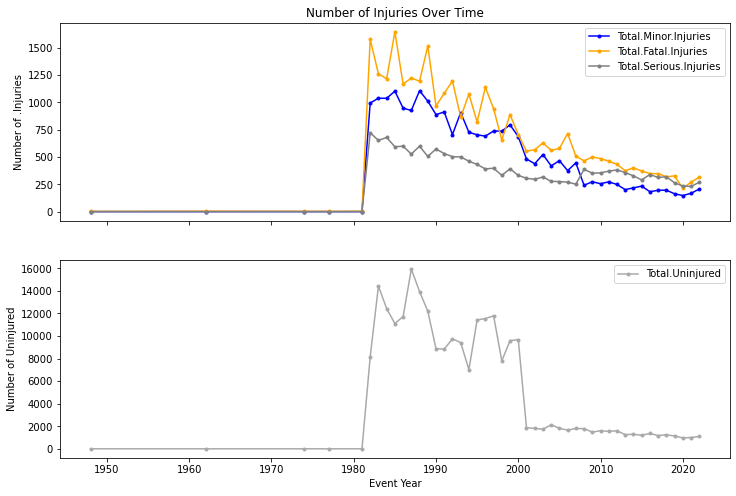

In [133]:
# Line plot (assuming a time series or ordered data)

fig , (ax,ax2) = plt.subplots(2, 1, figsize=(12,8), sharex=True)
injuries_by_year = df.groupby('Event.Year')[['Total.Minor.Injuries', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Uninjured']].sum().reset_index()

ax.plot(injuries_by_year['Event.Year'], injuries_by_year['Total.Minor.Injuries'], marker='.', color='blue',label='Total.Minor.Injuries')
ax.plot(injuries_by_year['Event.Year'], injuries_by_year['Total.Fatal.Injuries'],marker='.', color='orange', label='Total.Fatal.Injuries')
ax.plot(injuries_by_year['Event.Year'], injuries_by_year['Total.Serious.Injuries'],marker='.',color='gray', label='Total.Serious.Injuries')

ax.set_title('Number of Injuries Over Time')
ax.set_ylabel('Number of .Injuries')

ax2.plot(injuries_by_year['Event.Year'], injuries_by_year['Total.Uninjured'], marker='.',color='darkgray', label='Total.Uninjured')
ax2.set_ylabel('Number of Uninjured')
ax2.set_xlabel('Event Year')
ax2.legend()

ax.legend()
plt.savefig("my_plot.png")
plt.show()

In [134]:
injuries_by_year.to_csv('Total Injuries perYear.csv')

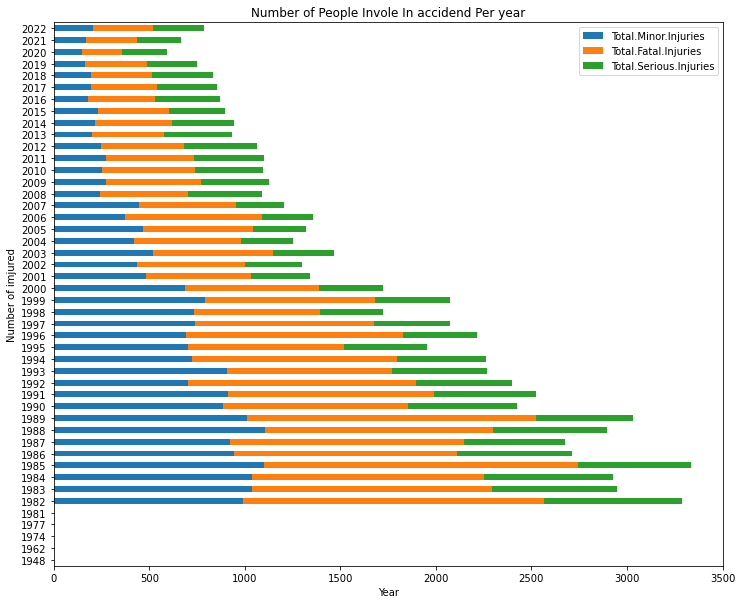

In [135]:
# Colonnes numériques à agréger
import matplotlib.pyplot as plt

# Créer un graphique à barres empilées
injuries_by_year[['Total.Minor.Injuries','Total.Fatal.Injuries','Total.Serious.Injuries','Event.Year']].set_index('Event.Year').plot(kind='barh', stacked=True, figsize=(12, 10))
plt.title('Number of People Invole In accidend Per year')
plt.ylabel('Number of imjured')
plt.xlabel('Year')
plt.show()


In [136]:
Sumary = df.groupby(['Make'])['Total.Uninjured'].sum().sort_values(ascending=False)
Sumary

Make
BOEING                      84283.0
CESSNA                      32336.0
MCDONNELL DOUGLAS           29652.0
PIPER                       17020.0
AIRBUS INDUSTRIE             8499.0
                             ...   
HAPHEY BRUCE FREDERIC           0.0
HANSON ROBERT H                 0.0
HANSON LONN                     0.0
HANSON GERALD                   0.0
107.5 FLYING CORPORATION        0.0
Name: Total.Uninjured, Length: 7176, dtype: float64

In [137]:
Sumary = df.groupby(['Model'])['Total.Uninjured'].sum().sort_values(ascending=False)
Sumary

Model
DC-10-10        6710.0
DC-10-30        4053.0
727-200         3695.0
DC-9-82         3161.0
L-1011-385-1    2775.0
                 ...  
BA 3101            0.0
S64E               0.0
S6S                0.0
S6S 2-33           0.0
RUTAN              0.0
Name: Total.Uninjured, Length: 10167, dtype: float64

### Recommend Aircraft Models to the Company
Use a Risk Scoring System
Calculation of risk score for each aircraft model based on:

Number of incidents or accidents

Event date, Make and Model

Severity of  incidents

Usage type

Based on the frequency and severity of incidents, we recommend considering aircraft such as the Boeing and Cessna.  which show low incident rates and minimal injury severity.